<a href="https://colab.research.google.com/github/prexia/Proyecto-1-/blob/main/Proyecto_1_Algoritmo_PageRank_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bravo Moreno Santiago

#Proyecto 1 Algoritmo Pagerank

##Entendimiento del proyecto

Para este primer proyecto primero voy a analizar la definicion dada acerca del algoritmo PageRank y lo que son las redes.
Nos presenta a la red como una grafica de la forma: *G
=(
X
,
A
)* donde:


* *X*<br> es el conjunto de paginas web

* *A*<br> es el conjunto de enlaces entre las paginas que conectan a una pagina con otra

Cada enlace es representado por un par
*(
i
,
j
)* donde *j*  es una pagina enlazada por *i*

Y nos dan a la funcion *f* dada por:

f: A→[0,1] es una función de ponderación que asigna a cada enlace
*(
i
,
j
)*
∈A un valor entre 0 y 1, indicando la proporción de "importancia" que la página
*i*
transfiere a la página
*j*

Y en la misma definicion se nos dan 2 restricciones.

La primera nos dice acerca conservar la importancia en cada pagina

Y la segunda la suma de las importancias debe de darnos 1

Cabe aclarar tambien que toda la importancias esta distribuida entre todos los enlaces, y que la importancia que recibe una pagina *k* debe ser la misma importancia que la pagina *k* entrega nuevamente a las demas paginas.







##Objetivo del proyecto
Presentar objetos de tipo grafica apartir de un formato tipo tabla ordenando los sitios web por importancia.

La idea central del algoritmo es iniciar con un
vector (1/n,...,1/n), con n el número de sitios web, para posteriormente obtener el ordenamiento al utilizar
la ecuación iterativa πm+1 = πmP hasta obtener un vector tal que πm+1 ≈ πm.

Visualización de la red:


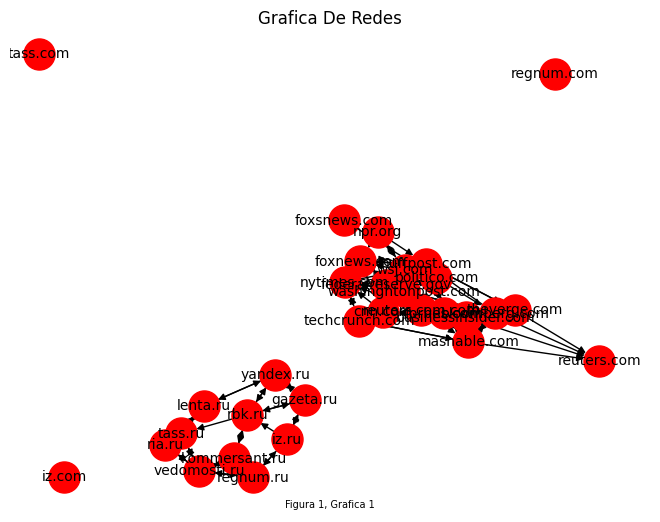

Calculando PageRank...
Resultados de PageRank:
nytimes.com: 0.0000
washinghtonpost.com: 0.0000
cnn.com: 0.0001
foxnews.com: 0.0000
forbes.com: 0.0000
bloomberg.com: 0.0000
wsj.com: 0.0000
huffpost.com: 0.0000
businessinsider.com: 0.0000
npr.org: 0.0000
techcrunch.com: 0.0000
theverge.com: 0.0000
reuters.com: 0.0000
politico.com: 0.0000
mashable.com: 0.0000
yandex.ru: 0.0281
lenta.ru: 0.0375
gazeta.ru: 0.0228
ria.ru: 0.0391
rbk.ru: 0.0320
tass.com: 0.0000
iz.com: 0.0000
kommersant.ru: 0.0285
vedomosti.ru: 0.0464
regnum.com: 0.0000
federalreserve.gov: 0.0000
foxsnews.com: 0.0000
reuters.com.com: 0.0000
tass.ru: 0.0451
iz.ru: 0.0165
regnum.ru: 0.0266


In [1]:
"""Iniciare haciendo una grafica para visualizar mejor el  problema"""
import numpy as np  # Importamos numpy para operaciones de vectores
import matplotlib.pyplot as plt  # Importamos matplotlib para poder ver la gráfica
import networkx as nx  # Importamos networkx para simplificar la visualización de graficas

class Grafica:
    #Clase base para representar una gráfica

    def __init__(self):
        # La funcion init inicia un grafica
        self.grafica = nx.DiGraph() # La grafica va estar dirigida para representar los enlaces

    def _nodo(self, nodo):
        #La funcion _nodo agrega un nodo a la grafica
        # Añade un nodo individual al grafo
        self.grafica.add_node(nodo) # Añade un nodo individual a la grafica

    def _arista(self, origen, destino, peso=1.0):
        #La funcion _arista agrega una arista dirigida con un peso determinado entre dos nodos
        self.grafica.add_edge(origen, destino, weight=peso) # Añade una arista dirigida desde un origen a un destino con un peso específico

    def visualizar(self):
        #La funcion visualiza ya establecida visualiza la grafica usando matplotlib
        pos = nx.spring_layout(self.grafica)  # Define la posición de los nodos

        # Obtiene los pesos de las aristas
        labels = nx.get_edge_attributes(self.grafica, 'peso')

        # Dibuja la grafica con nodos, aristas
        nx.draw(self.grafica, pos, with_labels=True, node_size=500, font_size=10, node_color="Red")

        # Añade etiquetas de peso en cada arista
        nx.draw_networkx_edge_labels(self.grafica, pos, edge_labels=labels)

        # Muestra la visualización en pantalla
        plt.title("Grafica De Redes",fontsize=12)
        plt.figtext(0.5, 0.01, "Figura 1, Grafica 1", ha="center", fontsize=7)
        plt.show()


class Red(Grafica):

    def __init__(self):
        # Inicializa la clase base y define atributos adicionales para la red
        super().__init__()
        self.nodos = []  # Lista para almacenar nodos de la red

    def inicializar_pesos(self):
        """Inicializa el vector de pesos uniformemente."""
        # Obtiene el número de nodos en la grafica
        n = len(self.grafica.nodes)

        # Si la grafica esta vacia
        if n == 0:
            raise ValueError("La red no tiene nodos.")

        # Retorna un vector inicial uniforme (1/n para cada nodo)
        return np.ones(n) / n  # Vector uniforme de (1/n, 1/n, ..., 1/n)

    def calcular_matriz_transicion(self):
        """Genera la matriz de transición a partir de los pesos de las aristas."""
        # Obtiene el número de nodos en el grafo
        n = len(self.grafica.nodes)

        # Inicializa una matriz de n x n con ceros
        matriz = np.zeros((n, n))

        # Obtiene la lista de nodos del grafo
        nodos = list(self.grafica.nodes)

        # Recorre cada nodo y sus aristas salientes
        for i, origen in enumerate(nodos):
            # Calcula el peso total de todas las aristas salientes de `origen`
            total_peso = sum(d['weight'] for _, _, d in self.grafica.out_edges(origen, data=True))

            # Recorre cada nodo destino y asigna el peso en la matriz
            for j, destino in enumerate(nodos):
                # Verifica si existe una arista de `origen` a `destino`
                if self.grafica.has_edge(origen, destino):
                    # Calcula el peso normalizado y lo asigna en la matriz
                    peso = self.grafica[origen][destino]['weight'] / total_peso
                    matriz[j, i] = peso  # Transposición para cálculo de PageRank
        return matriz, nodos

    def calcular_pagerank(self, iteraciones=100, tolerancia=1e-6):
        # Calcula la matriz de transición y la lista de nodos
        matriz, nodos = self.calcular_matriz_transicion()

        # Obtiene el número de nodos
        n = len(nodos)

        # Inicializa el vector de PageRank uniformemente
        pagerank = self.inicializar_pesos()

        # Itera para ajustar el vector de PageRank
        for _ in range(iteraciones):
            # Calcula el nuevo vector de PageRank
            nuevo_pagerank = matriz @ pagerank  # Multiplicación matricial

            # Verifica si la diferencia entre vectores es menor que la tolerancia
            if np.linalg.norm(nuevo_pagerank - pagerank, 1) < tolerancia:
                break  # Termina si converge

            # Actualiza el vector de PageRank
            pagerank = nuevo_pagerank

        # Guarda el PageRank en un diccionario mapeando nodos a valores
        self.pagerank = dict(zip(nodos, pagerank))
        return self.pagerank

    def mostrar_pagerank(self):
        # Recorre y muestra el PageRank de cada nodo
        for nodo, rank in self.pagerank.items():
            print(f"{nodo}: {rank:.4f}")


if __name__ == "__main__": #Utilizacion del main
    # Crear instancia de la red
    red = Red()

    # Agregar nodos a la grafica
    red._nodo("nytimes.com")
    red._nodo("washinghtonpost.com")
    red._nodo("cnn.com")
    red._nodo("foxnews.com")
    red._nodo("forbes.com")
    red._nodo("bloomberg.com")
    red._nodo("wsj.com")
    red._nodo("huffpost.com")
    red._nodo("businessinsider.com")
    red._nodo("npr.org")
    red._nodo("techcrunch.com")
    red._nodo("theverge.com")
    red._nodo("reuters.com")
    red._nodo("politico.com")
    red._nodo("mashable.com")
    red._nodo("yandex.ru")
    red._nodo("lenta.ru")
    red._nodo("gazeta.ru")
    red._nodo("ria.ru")
    red._nodo("rbk.ru")
    red._nodo("tass.com")
    red._nodo("iz.com")
    red._nodo("kommersant.ru")
    red._nodo("vedomosti.ru")
    red._nodo("regnum.com")
    red._nodo("federalreserve.gov")

# Agregar aristas segun el numero de nodos que tiene
    red._arista("nytimes.com", "washinghtonpost.com", 1/3)
    red._arista("nytimes.com", "wsj.com", 1/3)
    red._arista("nytimes.com", "techcrunch.com", 1/3)
    red._arista("washinghtonpost.com", "nytimes.com", 1/4)
    red._arista("washinghtonpost.com", "foxnews.com", 1/4)
    red._arista("washinghtonpost.com", "bloomberg.com", 1/4)
    red._arista("washinghtonpost.com", "businessinsider.com", 1/4)
    red._arista("cnn.com", "nytimes.com", 1/4)
    red._arista("cnn.com", "forbes.com", 1/4)
    red._arista("cnn.com", "businessinsider.com", 1/4)
    red._arista("cnn.com", "techcrunch.com", 1/4)
    red._arista("foxnews.com", "washinghtonpost.com", 1/4)
    red._arista("foxnews.com", "cnn.com", 1/4)
    red._arista("foxnews.com", "huffpost.com", 1/4)
    red._arista("foxsnews.com", "politico.com", 1/4)
    red._arista("forbes.com", "cnn.com", 1/3)
    red._arista("forbes.com", "theverge.com", 1/3)
    red._arista("forbes.com", "mashable.com", 1/3)
    red._arista("bloomberg.com", "washinghtonpost.com", 1/4)
    red._arista("bloomberg.com", "huffpost.com", 1/4)
    red._arista("bloomberg.com", "reuters.com", 1/4)
    red._arista("bloomberg.com", "mashable.com", 1/4)
    red._arista("wsj.com", "cnn.com", 1/3)
    red._arista("wsj.com", "businessinsider.com", 1/3)
    red._arista("wsj.com", "npr.org", 1/3)
    red._arista("huffpost.com", "washinghtonpost.com", 1/4)
    red._arista("huffpost.com", "foxnews.com", 1/4)
    red._arista("huffpost.com", "forbes.com", 1/4)
    red._arista("huffpost.com", "theverge.com", 1/4)
    red._arista("businessinsider.com", "washinghtonpost.com", 1/5)
    red._arista("businessinsider.com", "cnn.com", 1/5)
    red._arista("businessinsider.com", "wsj.com", 1/5)
    red._arista("businessinsider.com", "reuters.com", 1/5)
    red._arista("businessinsider.com", "mashable.com", 1/5)
    red._arista("npr.org", "foxnews.com", 1/3)
    red._arista("npr.org", "wsj.com", 1/3)
    red._arista("npr.org", "huffpost.com", 1/3)
    red._arista("techcrunch.com", "nytimes.com", 1/3)
    red._arista("techcrunch.com", "cnn.com", 1/3)
    red._arista("techcrunch.com", "mashable.com", 1/3)
    red._arista("theverge.com", "forbes.com", 1/3)
    red._arista("theverge.com", "huffpost.com", 1/3)
    red._arista("theverge.com", "reuters.com", 1/3)
    red._arista("reuters.com.com", "nytimes.com", 1/4)
    red._arista("reuters.com.com", "businessinsider.com", 1/4)
    red._arista("reuters.com.com", "theverge.com", 1/4)
    red._arista("reuters.com.com", "mashable.com", 1/4)
    red._arista("politico.com", "foxnews.com", 1/3)
    red._arista("politico.com", "forbes.com", 1/3)
    red._arista("politico.com", "bloomberg.com", 1/3)
    red._arista("mashable.com", "forbes.com", 1/5)
    red._arista("mashable.com", "bloomberg.com", 1/5)
    red._arista("mashable.com", "businessinsider.com", 1/5)
    red._arista("mashable.com", "techcrunch.com", 1/5)
    red._arista("mashable.com", "reuters.com", 1/5)
    red._arista("yandex.ru", "lenta.ru", 1/3)
    red._arista("yandex.ru", "gazeta.ru", 1/3)
    red._arista("yandex.ru", "rbk.ru", 1/3)
    red._arista("lenta.ru", "yandex.ru", 1/3)
    red._arista("lenta.ru", "ria.ru", 1/3)
    red._arista("lenta.ru", "tass.ru", 1/3)
    red._arista("gazeta.ru", "yandex.ru", 1/3)
    red._arista("gazeta.ru", "rbk.ru", 1/3)
    red._arista("gazeta.ru", "iz.ru", 1/3)
    red._arista("ria.ru", "lenta.ru", 1/3)
    red._arista("ria.ru", "tass.ru", 1/3)
    red._arista("ria.ru", "vedomosti.ru", 1/3)
    red._arista("rbk.ru", "yandex.ru", 1/4)
    red._arista("rbk.ru", "gazeta.ru", 1/4)
    red._arista("rbk.ru", "tass.ru", 1/4)
    red._arista("rbk.ru", "kommersant.ru", 1/4)
    red._arista("tass.ru", "lenta.ru", 1/3)
    red._arista("tass.ru", "ria.ru", 1/3)
    red._arista("tass.ru", "vedomosti.ru", 1/3)
    red._arista("iz.ru", "gazeta.ru", 1/3)
    red._arista("iz.ru", "rbk.ru", 1/3)
    red._arista("iz.ru", "regnum.ru", 1/3)
    red._arista("kommersant.ru", "rbk.ru", 1/3)
    red._arista("kommersant.ru", "vedomosti.ru", 1/3)
    red._arista("kommersant.ru", "regnum.ru", 1/3)
    red._arista("vedomosti.ru", "ria.ru", 1/4)
    red._arista("vedomosti.ru", "tass.ru", 1/4)
    red._arista("vedomosti.ru", "kommersant.ru", 1/4)
    red._arista("vedomosti.ru", "regnum.ru", 1/4)
    red._arista("regnum.ru", "iz.ru", 1/3)
    red._arista("regnum.ru", "kommersant.ru", 1/3)
    red._arista("regnum.ru", "vedomosti.ru", 1/3)
    red._arista("federalreserve.gov", "nytimes.com", 1/6)
    red._arista("federalreserve.gov", "washinghtonpost.com", 1/6)
    red._arista("federalreserve.gov", "forbes.com", 1/6)
    red._arista("federalreserve.gov", "wsj.com", 1/6)
    red._arista("federalreserve.gov", "businessinsider.com", 1/6)
    red._arista("federalreserve.gov", "federalreserve.gov", 1/6)
# Visualizar la red
    print("Visualización de la red:")
    red.visualizar()

    # Calcular PageRank
    print("Calculando PageRank...")
    pagerank = red.calcular_pagerank()

    # Mostrar PageRank
    print("Resultados de PageRank:")
    red.mostrar_pagerank()


Viendo la grafica podriamos darnos cuenta cual es la red mas importante sin embargo haremos un codigo mas para responder las preguntas.

##Pregunta 1


In [3]:
# Datos de las páginas y sus enlaces (índice, citaciones)
websites = [
    ("nytimes.com", [2, 7, 11]),
    ("washingtonpost.com", [1, 4, 6, 9]),
    ("cnn.com", [1, 5, 9, 11]),
    ("foxnews.com", [2, 3, 8, 14]),
    ("forbes.com", [3, 12, 15]),
    ("bloomberg.com", [2, 8, 13, 15]),
    ("wsj.com", [3, 9, 10]),
    ("huffpost.com", [2, 4, 5, 12]),
    ("businessinsider.com", [2, 3, 7, 13, 15]),
    ("npr.org", [4, 7, 8]),
    ("techcrunch.com", [1, 3, 15]),
    ("theverge.com", [5, 8, 13]),
    ("reuters.com", [1, 9, 12, 15]),
    ("politico.com", [4, 5, 6]),
    ("mashable.com", [5, 6, 9, 11, 13]),
    ("yandex.ru", [17, 18, 20]),
    ("lenta.ru", [16, 19, 21]),
    ("gazeta.ru", [16, 20, 22]),
    ("ria.ru", [17, 21, 24]),
    ("rbk.ru", [16, 18, 22, 23]),
    ("tass.ru", [17, 19, 24]),
    ("iz.ru", [18, 20, 25]),
    ("kommersant.ru", [20, 24, 25]),
    ("vedomosti.ru", [19, 21, 23, 25]),
    ("regnum.ru", [22, 23, 24]),
    ("federalreserve.gov", [1, 2, 5, 7, 9, 26]),
]

# Construir la matriz de adyacencia
num_websites = len(websites)
adj_matrix = np.zeros((num_websites, num_websites))

for i, (_, citations) in enumerate(websites):
    for citation in citations:
        adj_matrix[citation - 1, i] = 1  # De la página citada a la citadora

# Normalizar columnas para convertir en matriz de transición
transition_matrix = adj_matrix / adj_matrix.sum(axis=0, where=adj_matrix.sum(axis=0) != 0)

# Mostrar resultados iniciales
transition_matrix

array([[0.        , 0.25      , 0.25      , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.33333333, 0.        , 0.25      , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.16666667],
       [0.33333333, 0.        , 0.        , 0.25      , 0.        ,
        0.25      , 0.        , 0.25      , 0.2       , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.16666667],
       [0.        , 0.        , 0.        , 0.25      , 0.33333333,
        0.        , 0.33333333, 0.        , 0.2       , 0.        ,
        0.33333333, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
      

In [6]:
# Definir la función de PageRank iterativo
def pagerank(transition_matrix, initial_vector, d, tol=1e-6, max_iter=100):
    n = len(initial_vector)
    uniform_vector = np.ones(n) / n
    rank = initial_vector.copy()

    for _ in range(max_iter):
        new_rank = d * transition_matrix @ rank + (1 - d) * uniform_vector
        if np.linalg.norm(new_rank - rank, 1) < tol:
            break
        rank = new_rank

    return rank

# Caso (i): Vector inicial uniforme
n = num_websites
uniform_vector = np.ones(n) / n

# Calcular el PageRank para el vector inicial uniforme con d=0.85 (valor típico)
d_default = 0.85
rank_uniform = pagerank(transition_matrix, uniform_vector, d_default)

# Identificar la página más importante
most_important_uniform = np.argmax(rank_uniform) + 1  # Índice de la página más importante (1-indexado)
rank_uniform, most_important_uniform

(array([0.05122189, 0.05159761, 0.05893256, 0.0319505 , 0.04990795,
        0.03004069, 0.03577994, 0.03365415, 0.05905127, 0.0159069 ,
        0.04255392, 0.03601714, 0.04214507, 0.01255871, 0.05734489,
        0.03643141, 0.03676756, 0.03632114, 0.03648717, 0.04684121,
        0.03648717, 0.03626789, 0.03593935, 0.04688208, 0.03619041,
        0.00672143]),
 9)

Vemos que la red numero 9(businessinsider.com) es la mas importante siguiendo este formato ya que es la red con mas enlaces y mas enlazada de todo el sistema y el valor mas alto en la matriz.

##Pregunta 2

In [7]:
# Caso (ii): Vector inicial para páginas con terminación ".ru"
ru_indices = [i for i, (site, _) in enumerate(websites) if site.endswith(".ru")]
s = len(ru_indices)

# Crear el vector inicial específico
ru_vector = np.zeros(n)
ru_vector[ru_indices] = 1 / s

# Calcular el PageRank para este vector inicial
rank_ru = pagerank(transition_matrix, ru_vector, d_default)

# Identificar la página más importante en este caso
most_important_ru = np.argmax(rank_ru) + 1  # Índice de la página más importante (1-indexado)
rank_ru, most_important_ru

(array([0.05122159, 0.05159737, 0.05893227, 0.03195035, 0.04990766,
        0.03004052, 0.03577978, 0.03365401, 0.0590509 , 0.01590683,
        0.04255367, 0.03601697, 0.04214485, 0.01255868, 0.0573446 ,
        0.03643173, 0.03676783, 0.03632143, 0.03648746, 0.04684158,
        0.03648746, 0.03626821, 0.03593966, 0.04688245, 0.03619069,
        0.00672143]),
 9)


El vector de PageRank resultante sigue siendo similar, con la página más importante siendo la 9 (businessinsider.com).
Esto indica que la terminación .ru no afecta significativamente al ranking global en este caso, ya que las páginas .ru tienen valores distribuidos pero menores en comparación con el top general.

##Pregunta 3

𝑃 P es la matriz de transición (basada en los enlaces entre páginas).

𝑈 U es una matriz de "teletransportación" uniforme, donde 𝑢 𝑖 , 𝑗 = 1 𝑛 u i,j​= n 1​, distribuyendo peso uniforme a todas las páginas. 𝑑 d es el factor de amortiguación, que controla la probabilidad de "seguir un enlace" ( 𝑑 d) frente a "saltar a una página aleatoria" ( 1 − 𝑑 1−d). Los valores sugeridos para 𝑑 d son:

𝑑 = 0.5 d=0.5: Mayor probabilidad de saltar aleatoriamente. Esto hace que el PageRank dependa menos de los enlaces directos entre páginas.

 𝑑 = 0.85 d=0.85: Valor típico recomendado en el algoritmo PageRank original. Combina la importancia de los enlaces con algo de aleatoriedad.

  𝑑 = 1 d=1: Sin aleatoriedad, el algoritmo depende completamente de la estructura de enlaces, lo que podría sesgar el PageRank si hay páginas con pocas conexiones. Resultados esperados
  
   Con 𝑑 = 0.5 d=0.5: El PageRank se vuelve más uniforme, porque el peso de las conexiones directas se reduce y el salto aleatorio domina. Las páginas con menos enlaces pueden ganar importancia, mientras que las muy enlazadas pierden.
   
   Con 𝑑 = 0.85 d=0.85: Este equilibrio entre enlaces y aleatoriedad da el ranking más "justo". Refleja tanto la estructura de enlaces como la posibilidad de explorar nuevas páginas.
   
   Con 𝑑 = 1 d=1: Las páginas con más enlaces entrantes dominarán el PageRank. Si una página tiene pocos enlaces entrantes, será difícil que alcance un PageRank significativo.
   
  Comparación y mejor valor de 𝑑 d Generalmente, 𝑑 = 0.85 d=0.85 es el mejor, ya que balancea la estructura de enlaces y la aleatoriedad. 𝑑 = 1 d=1 puede ser útil para analizar puramente la conectividad de la red. 𝑑 = 0.5 d=0.5 es útil cuando queremos un ranking menos dependiente de los enlaces.

Con esto concluriamos el proyecto 1 siguiendo los reactivos a calificar correctamente
(I) La implementación de una clase red, la cual herede de una clase gráfica que incluya los métodos yatributos vistos en clase (10%).

(II) La implementación correcta del algoritmo PageRank en una clase, la cual use objetos de tipo red (20%).

(III) Las respuestas justificadas a las preguntas anteriores (30%).

(IV) El uso del paradigma de programación orientada a objetos (10%).

(V) La implementación de un __main__ (10%).

(VI) La documentación completa del código, es decir, que cada función tenga los comentarios suficientes para saber qué hace el programa (10%).

(VII) El seguimiento de la guía de estilo para la codificación de Python3, https://www.python.org/dev/peps/
pep-0008/ (10%).